In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/creditcard.csv')
df.shape

(284807, 31)

In [3]:
df_train, df_test = train_test_split(df, test_size =0.2)

In [4]:
X_train = df_train.loc[:, ~(df_train.columns).isin(['Class'])]
Y_train = df_train.Class
X_test = df_test.loc[:, ~(df_test.columns).isin(['Class'])]
Y_test = df_test.Class

In [5]:
ridger = linear_model.RidgeClassifier()
ridger.fit(X_train, Y_train)
Y_pred = ridger.predict(X_test)
precision_score(Y_test, Y_pred)

0.90476190476190477

In [6]:
lass = linear_model.Lasso()
lass.fit(X_train, Y_train)
Y_Lass_Pred = lass.predict(X_test)
# precision_score(Y_test, Y_Lass_Pred)
Y_Lass_Pred

array([ 0.00115234,  0.00234819,  0.0010024 , ...,  0.00135801,
        0.00240804,  0.00119344])

In [9]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_GBC_pred = gbc.predict(X_test)
precision_score(Y_test, Y_GBC_pred)

0.93333333333333335

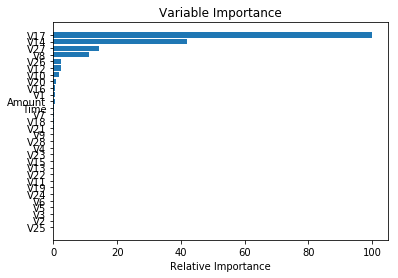

In [11]:
feature_importance = gbc.feature_importances_
import scipy
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_RFC_Pred = rfc.predict(X_test)
precision_score(Y_test, Y_RFC_Pred)

0.97333333333333338

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
parameters = {'n_estimators':range(10,100,2), class_weight:[.1,.9]}
GSrfc = GridSearchCV(rfc, parameters)

In [15]:
GSrfc.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 100, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
GSrfc.cv_results_

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jo

{'mean_fit_time': array([   9.78230437,   16.69148008,   20.9260637 ,   20.88431191,
          24.03473504,   28.3526063 ,   43.55877972,   41.42683935,
          46.65595619,   39.86355122,   34.9944884 ,   34.38395548,
          32.18537982,   37.995181  ,   45.22918161,   49.92279824,
          52.39398662,   50.74289338,   41.98616807,   42.90740561,
          44.76964339,   45.42171502,   47.88578598,   55.06211734,
          61.66106311,   72.1643827 ,   63.9832952 ,   57.56246018,
          68.96197565,   78.75077542,   78.1055971 ,  105.957364  ,
          90.01556865,   99.25460045,   69.42304937,   70.17203466,
          72.86755967,   93.95659232,   85.992613  ,   86.33455213,
          79.08586558,   79.03808427,   79.77915923,   80.75687472,
          83.49332078]),
 'mean_score_time': array([ 0.07793061,  0.13664428,  0.14415963,  0.14053845,  0.15878765,
         0.21582596,  0.27713927,  0.28683035,  0.30788891,  0.23197834,
         0.22097492,  0.22211623,  0.23162421

In [18]:
GSrfc.best_score_

0.9995391603941276

In [19]:
GSrfc.best_params_

{'n_estimators': 58}

Best Algorithm is RandomForrest with n_estimators = to 58

In [20]:
best_rfc = RandomForestClassifier(n_estimators=58)
best_rfc.fit(X_train, Y_train)
rfc_pred_y = best_rfc.predict(X_test)
precision_score(Y_test, rfc_pred_y)

0.97368421052631582